In [177]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [178]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/emails.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [179]:
data.info()
data.describe()
data.isnull().sum()
data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5168 entries, 0 to 5167
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.4+ MB


,0
Email No.,object
the,int64
to,int64
ect,int64
and,int64
...,...
military,int64
allowing,int64
ff,int64
dry,int64


In [180]:
data.head()


,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [181]:
data.tail()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
5163,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5164,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5165,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5166,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1
5167,Email 5172,22,24,5,1,6,5,148,8,2,...,0,0,0,0,0,0,0,0,0,0


In [182]:
x = data.drop('Prediction', axis = 1)
y = data['Prediction']

In [183]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Naive Bayes
It is best for classification problems like spam detection

In [184]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through columns of x_train and encode string columns
for col in x_train.columns:
    if x_train[col].dtype == 'object':  # Check if the column is of object (string) type
        x_train[col] = label_encoder.fit_transform(x_train[col])

# Fit the model after encoding
model1 = MultinomialNB()
model1.fit(x_train, y_train)

MultinomialNB()

In [185]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through columns of x_train and encode string columns
for col in x_train.columns:
    if x_train[col].dtype == 'object':  # Check if the column is of object (string) type
        x_train[col] = label_encoder.fit_transform(x_train[col])

# Transform the test data using the same LabelEncoder
for col in x_test.columns:
    if x_test[col].dtype == 'object':
        # Use a new LabelEncoder instance for each column in x_test
        # or fit the existing label_encoder on the training data for that column
        x_test[col] = LabelEncoder().fit_transform(x_test[col])
        # Alternatively:
        # x_test[col] = label_encoder.fit(x_train[col]).transform(x_test[col])

# Fit the model after encoding
model1 = MultinomialNB()
model1.fit(x_train, y_train)

y_pred = model1.predict(x_test)  # Now this should work without error

In [186]:
from sklearn.metrics import accuracy_score
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.7940038684719536


# Support Vector Machine
It is best for binary classification problems and text data



In [187]:
from sklearn.svm import SVC
model2 = SVC()
model2.fit(x_train, y_train)

SVC()

In [188]:
y_pred = model2.predict(x_test)

In [189]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.7079303675048356


# Logistic Regression
This is best for binary classification tsks.

In [190]:
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()
model3.fit(x_train, y_train)

LogisticRegression()

In [191]:
y_pred = model3.predict(x_test)

In [192]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.9245647969052224


# Random Forest
Ensemble method avoid overfitting and handle imbalance data

In [195]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier()
model4.fit(x_train, y_train)

RandomForestClassifier()

In [196]:
y_pred = model4.predict(x_test)

In [197]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.97678916827853


# Stacking

In [198]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Create individual models
model1 = LogisticRegression()
model2 = SVC()
model3 = MultinomialNB()
model4 = RandomForestClassifier()

# Create a StackingClassifier
ensemble_model = StackingClassifier(
    estimators=[
        ('model1', model1),
        ('model2', model2),
        ('model3', model3),
        ('model4', model4)
    ],
    final_estimator=LogisticRegression()
)

# Fit the ensemble model
ensemble_model.fit(x_train, y_train)

# Predict using the ensemble model
y_pred_ens = ensemble_model.predict(x_test)


In [199]:
print(f"Accuracy: {accuracy_score(y_test, y_pred_ens)}")

Accuracy: 0.9816247582205029


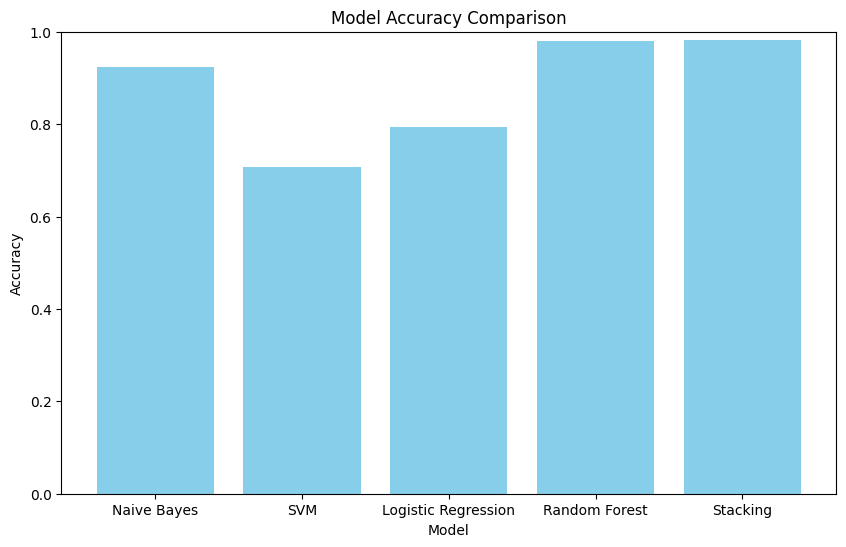

In [200]:
models = ['Naive Bayes', 'SVM', 'Logistic Regression', 'Random Forest', 'Stacking']

# Fit individual models before predicting
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)
model3.fit(x_train, y_train)
model4.fit(x_train, y_train)

# Calculate accuracies for all models, including the stacking model
accuracies = [accuracy_score(y_test, model1.predict(x_test)),
              accuracy_score(y_test, model2.predict(x_test)),
              accuracy_score(y_test, model3.predict(x_test)),
              accuracy_score(y_test, model4.predict(x_test)),
              accuracy_score(y_test, y_pred_ens)]
plt.figure(figsize=(10,6))
plt.bar(models, accuracies, color='skyblue')
plt.ylim([0.0, 1.0])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.show()

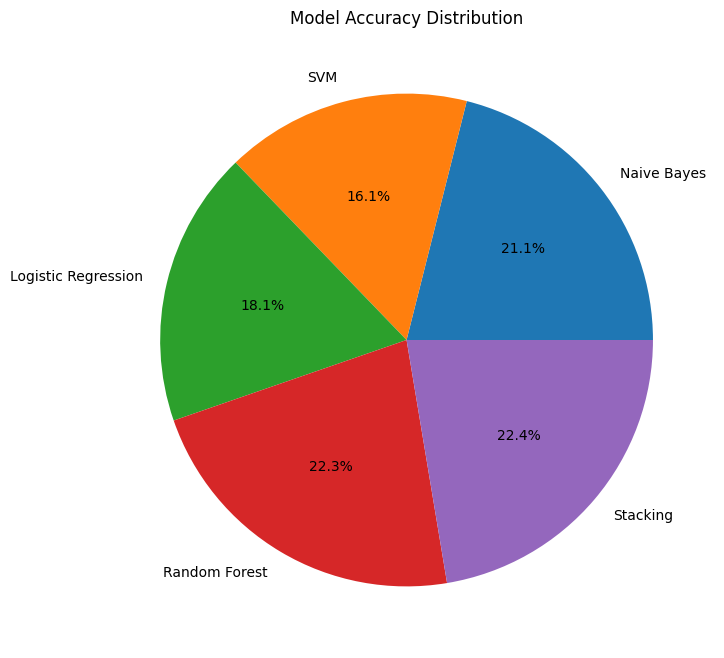

In [201]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(accuracies, labels=models, autopct='%1.1f%%', colors=plt.get_cmap('tab10').colors)
plt.title('Model Accuracy Distribution')
plt.show()


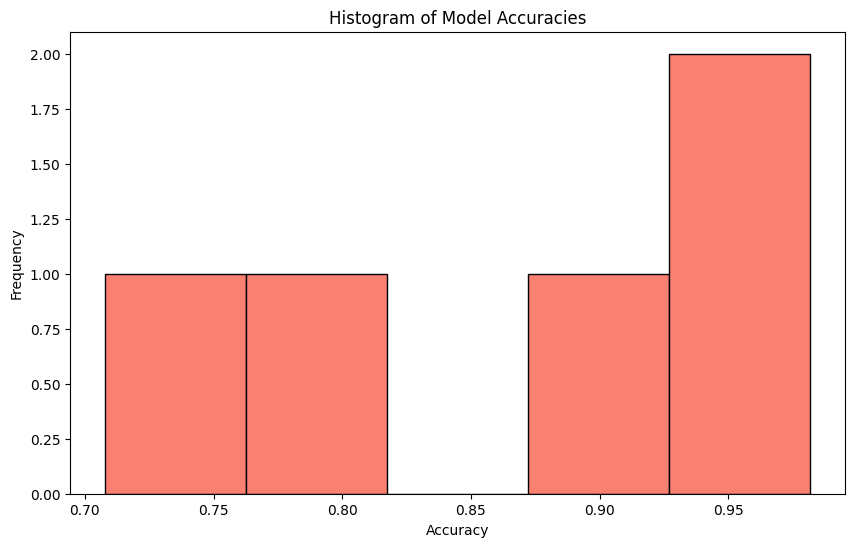

In [202]:
plt.figure(figsize=(10, 6))
plt.hist(accuracies, bins=len(models), color='salmon', edgecolor='black')
plt.title('Histogram of Model Accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()


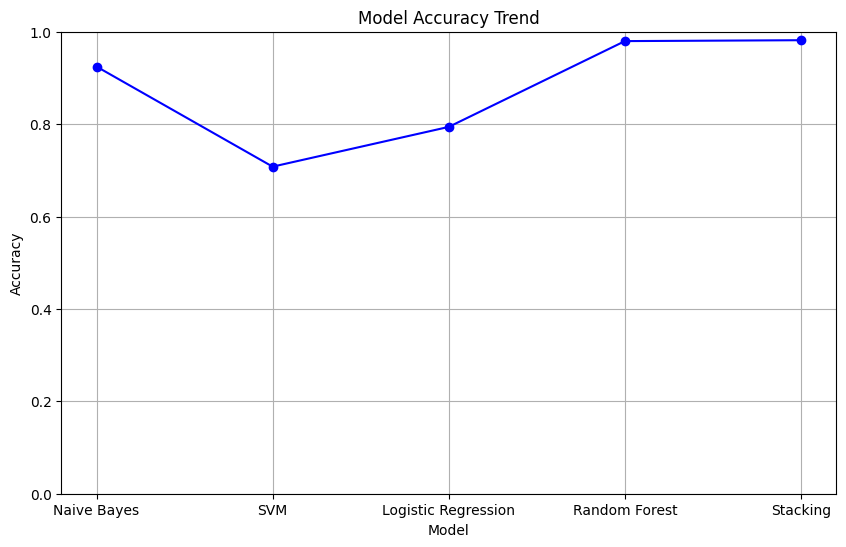

In [203]:

plt.figure(figsize=(10, 6))
plt.plot(models, accuracies, marker='o', linestyle='-', color='b')
plt.ylim([0.0, 1.0])
plt.title('Model Accuracy Trend')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


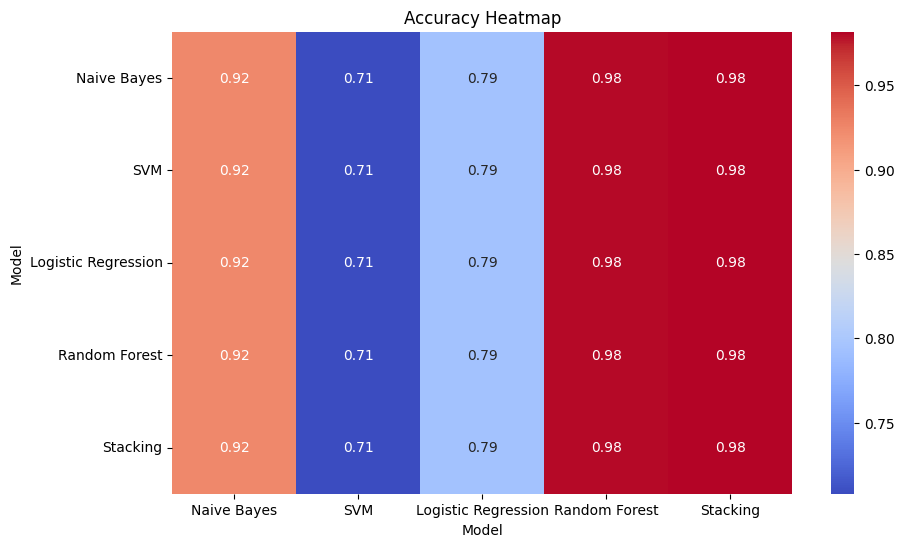

In [205]:
import numpy as np
import seaborn as sns
# Example data (replace with your actual matrix if available)
accuracy_matrix = np.array([accuracies for _ in range(len(models))])

plt.figure(figsize=(10, 6))
sns.heatmap(accuracy_matrix, xticklabels=models, yticklabels=models, cmap='coolwarm', annot=True)
plt.title('Accuracy Heatmap')
plt.xlabel('Model')
plt.ylabel('Model')
plt.show()


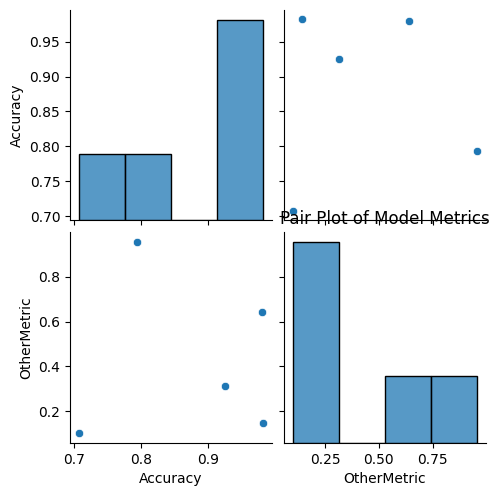

In [206]:
sns.pairplot(pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'OtherMetric': np.random.rand(len(models))  # Replace with actual metrics if available
}))
plt.title('Pair Plot of Model Metrics')
plt.show()


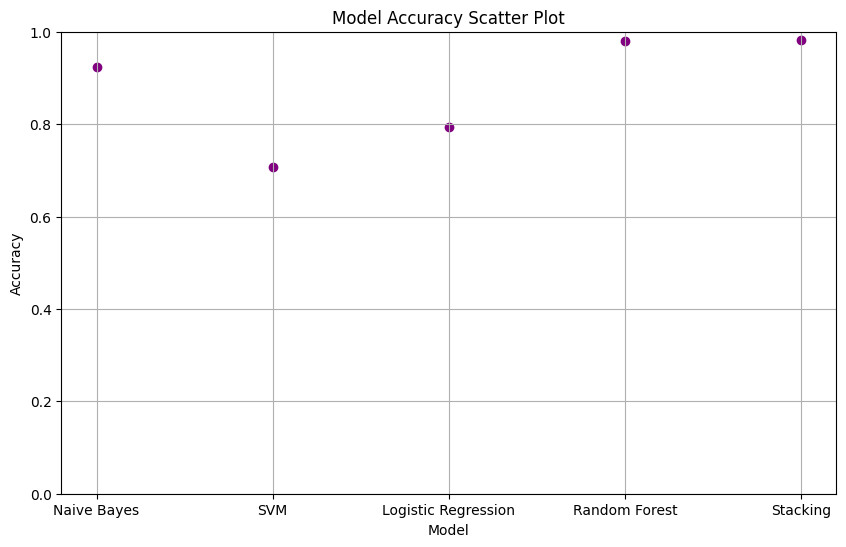

In [207]:
plt.figure(figsize=(10, 6))
plt.scatter(models, accuracies, color='purple')
plt.ylim([0.0, 1.0])
plt.title('Model Accuracy Scatter Plot')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
